## Modelling

In [1]:
# if on Colab, install pycaret and other dependencies
%pip install --pre pycaret
%pip install xgboost
%pip install deepchecks
%pip install m2cgen

### Mount Google Collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [3]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

### Load Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/cleaned_data.csv")
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


## Handling Class Imbalance
SMOTE

In [5]:
new_df = df.drop(['estimated_diameter_min'], axis=1)
new_df.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.883161,71745.401048,5.814362e+07,0
1,18.50,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.171412,56036.519484,6.311863e+07,0


Transforming the values of the `miss_distance` column

In [6]:
new_df['miss_distance'] = np.log1p(new_df['miss_distance'])
new_df

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.883161,71745.401048,17.878427,0
1,18.500,1.185878,109949.757148,17.837303,1
2,21.450,0.304818,24865.506798,18.023286,0
3,20.630,0.444672,78890.076805,17.229836,0
4,22.700,0.171412,56036.519484,17.960526,0
...,...,...,...,...,...
338166,28.580,0.011430,56646.985988,17.975416,0
338167,28.690,0.010865,21130.768947,17.199522,0
338168,21.919,0.245607,11832.041031,17.794459,0
338169,23.887,0.099229,56198.382733,15.461231,0


In [7]:
# Unique values and their counts
unique, count = np.unique(new_df['is_hazardous'], return_counts=True)

# Percentage calculation
percentage = (count / count.sum()) * 100

# Display results
for u, c, p in zip(unique, count, percentage):
    print(f"Class: {u}, Count: {c}, Percentage: {p:.2f}%")

Class: 0, Count: 295009, Percentage: 87.24%
Class: 1, Count: 43162, Percentage: 12.76%


In [8]:
X = new_df.drop('is_hazardous', axis=1)
y = new_df['is_hazardous']

In [9]:
print(X.shape)
print(y.shape)

(338171, 4)
(338171,)


In [10]:
## Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [11]:
# Unique values and their counts in y_train_smote
unique, count = np.unique(y_smote, return_counts=True)

# Percentage calculation
percentage = (count / count.sum()) * 100

# Display results
for u, c, p in zip(unique, count, percentage):
    print(f"Class: {u}, Count: {c}, Percentage: {p:.2f}%")

Class: 0, Count: 295009, Percentage: 50.00%
Class: 1, Count: 295009, Percentage: 50.00%


In [12]:
data = pd.concat([X_smote, y_smote], axis=1)
data

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140000,0.883161,71745.401048,17.878427,0
1,18.500000,1.185878,109949.757148,17.837303,1
2,21.450000,0.304818,24865.506798,18.023286,0
3,20.630000,0.444672,78890.076805,17.229836,0
4,22.700000,0.171412,56036.519484,17.960526,0
...,...,...,...,...,...
590013,20.683985,0.439697,54714.824582,17.436568,1
590014,21.783773,0.262903,97545.578314,17.560586,1
590015,17.493522,2.027625,68715.557596,16.998639,1
590016,20.312491,0.530450,35351.234256,16.683633,1


# Setup a new experiment

In [13]:
# init setup
from pycaret.classification import *
exp_name = setup(data = data,  target = 'is_hazardous',
                 session_id=123,
                 log_experiment=False,
                 experiment_name='exp_1',
                 use_gpu=False)

,Description,Value
0,Session id,123
1,Target,is_hazardous
2,Target type,Binary
3,Original data shape,"(590018, 5)"
4,Transformed data shape,"(590018, 5)"
5,Transformed train set shape,"(413012, 5)"
6,Transformed test set shape,"(177006, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


### Automatically compare models
Get the list of models in library and their id that can be used in functions.


In [ ]:
# compare models
best = compare_models(exclude='catboost') # catboost will take too long to train.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9358,0.9856,0.9467,0.9266,0.9365,0.8717,0.8719,167.3200
et,Extra Trees Classifier,0.9282,0.9813,0.9555,0.9061,0.9301,0.8564,0.8577,42.9520
dt,Decision Tree Classifier,0.9216,0.9216,0.9183,0.9244,0.9213,0.8431,0.8431,4.1240
lightgbm,Light Gradient Boosting Machine,0.8696,0.9572,0.9508,0.8180,0.8794,0.7392,0.7491,13.5220
xgboost,Extreme Gradient Boosting,0.8671,0.9535,0.9435,0.8184,0.8765,0.7342,0.7429,2.7180
gbc,Gradient Boosting Classifier,0.8532,0.9267,0.9768,0.7832,0.8694,0.7065,0.7291,87.1540
ada,Ada Boost Classifier,0.8460,0.9060,0.9728,0.7761,0.8634,0.6921,0.7154,18.1670
knn,K Neighbors Classifier,0.8262,0.8943,0.9272,0.7713,0.8421,0.6524,0.6661,3.0750
qda,Quadratic Discriminant Analysis,0.8231,0.8642,0.9771,0.7470,0.8467,0.6462,0.6792,0.3620
nb,Naive Bayes,0.8184,0.8392,0.9758,0.7422,0.8431,0.6368,0.6709,0.3290


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

### Manually train most promising models with custom parameters

Train again some of the best models. The accuracy obtained by default will be the same obtained with the `compare_models` function with the default config. However, in this case it is possible to provide custom hyperparameters to improve the model.  

In [ ]:
# train rf
rf = create_model('rf',
                   fold = 10,
                   bootstrap=True, ccp_alpha=0.0, class_weight=None,
                   criterion='gini', max_depth=None, max_features='sqrt',
                   max_leaf_nodes=None, max_samples=None,
                   min_impurity_decrease=0.0, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   monotonic_cst=None, n_estimators=100, n_jobs=-1,
                   oob_score=False, random_state=123,
                   warm_start=False,
                   return_train_score = True) # this allows checking overfitting

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


### Plots

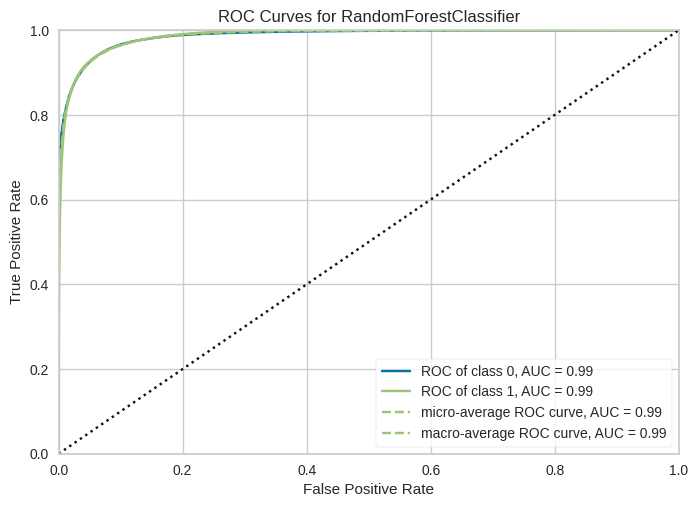

In [ ]:
plot_model(rf, plot = 'auc')

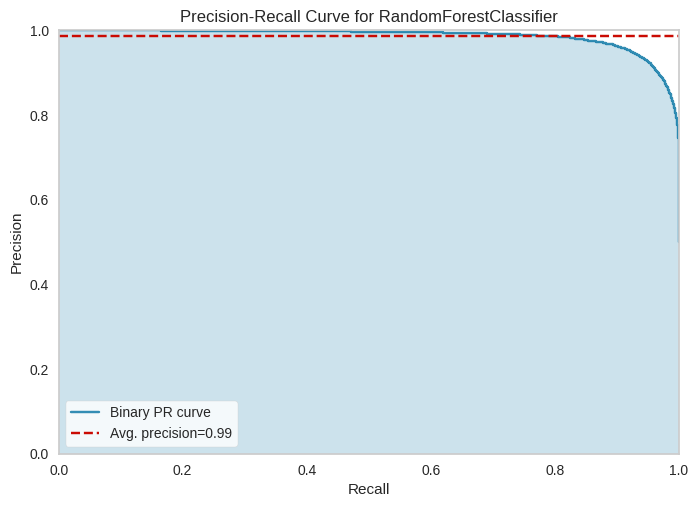

In [ ]:
plot_model(rf, plot = 'pr')

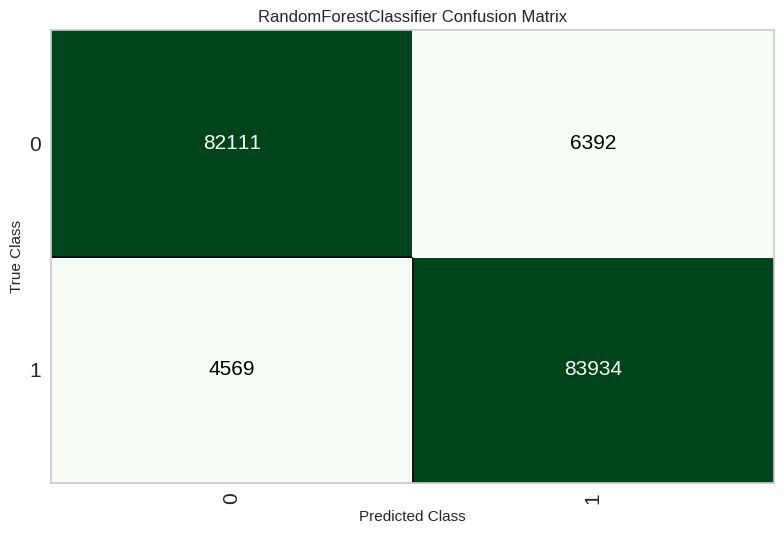

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

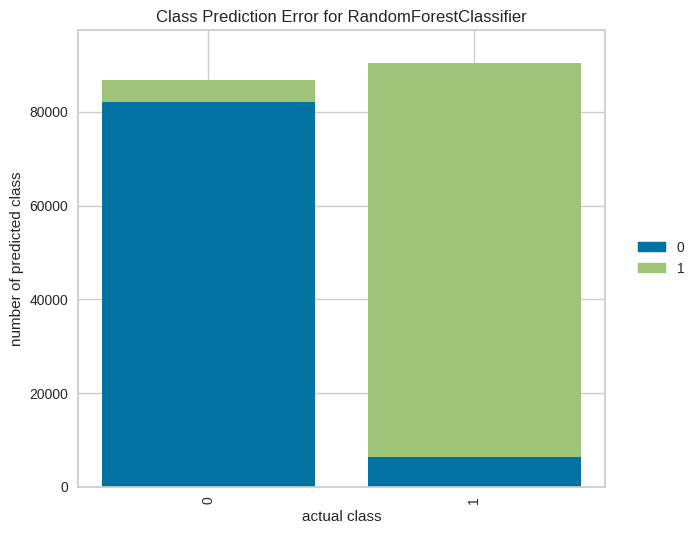

In [ ]:
plot_model(rf, plot = 'error')

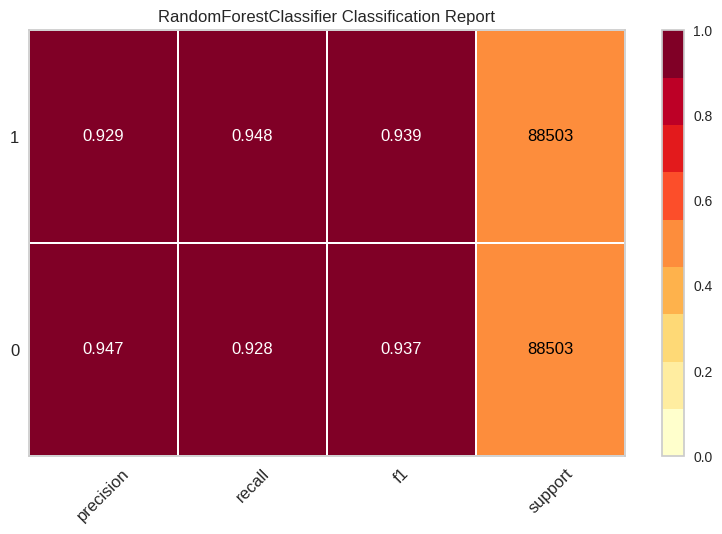

In [ ]:
plot_model(rf, plot = 'class_report')

In [18]:
save_model(rf, 'neo_random_forest', model_only=True)

Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['absolute_magnitude',
                                              'estimated_diameter_max',
                                              'relative_velocity',
                                              'miss_distance'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical...
                  RandomForestClassifier(bootstrap=True, ccp

In [20]:
rf = load_model('neo_random_forest')

Transformation Pipeline and Model Successfully Loaded


In [23]:
print(dir(rf))

['_Pipeline__memory_full_transform', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_is_fitted__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_cache_full_transform', '_can_fit_resample', '_can_fit_transform', '_can_inverse_transform', '_can_transform', '_check_feature_names', '_check_method_params', '_check_n_features', '_clear_final_estimator_fit_vars', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_feature_names_in', '_final_estimator', '_fit', '_fit_vars', '_get_default_requests', '_get_doc_link',

### Automatically optimize models

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter.

In [ ]:
tuned_rf = tune_model(rf, return_train_score = True, n_iter = 100) # n_iter is the number of models to be tested

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# compare the hyperparameters
print(rf) # default model
print(tuned_rf) # tuned model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_catego